In [31]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
from src.graph import GraphModel 
import src.estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from IPython.display import display
from pyvis.network import Network

import pickle
import os

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
path = '../data/connectomes/'
connectomes = os.listdir(path)
connectomes

['rattus.norvegicus_brain_1.graphml',
 'rhesus_brain_1.graphml',
 'mouse_brain_1.graphml']

In [33]:
nx.read_graphml

<function networkx.readwrite.graphml.read_graphml(path, node_type=<class 'str'>, edge_key_type=<class 'int'>, force_multigraph=False, *, backend=None, **backend_kwargs)>

# Mouse Brain

In [34]:
extension = 'graphml'
name = 'mouse_brain_1'
file_path = f'{path}{name}.{extension}'
print(file_path)
connectome = nx.read_graphml(file_path)
g = nx.adjacency_matrix(connectome).A

../data/connectomes/mouse_brain_1.graphml


/var/folders/ns/zy_pbb_s3591fwh2_q7z6g0h0000gn/T/ipykernel_30696/1421732315.py:6: VisibleDeprecationWarning: `.A` is deprecated and will be removed in v1.14.0. Use `.toarray()` instead.
  g = nx.adjacency_matrix(connectome).A


In [40]:
est = estimator.LogitRegEstimator2(g)
params, pvalues = est.estimate_parameters()

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                22731
Model:                          Logit   Df Residuals:                    22728
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                  0.1221
Time:                        13:25:56   Log-Likelihood:                -11934.
converged:                       True   LL-Null:                       -13594.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7895      0.147    -46.315      0.000      -7.077      -6.502
x1             0.0261      0.001     39.019      0.000       0.025       0.027
x2             0.0255      0.001     40.154      0.0

## Visualizations

In [41]:
ut = utils.GraphUtils()

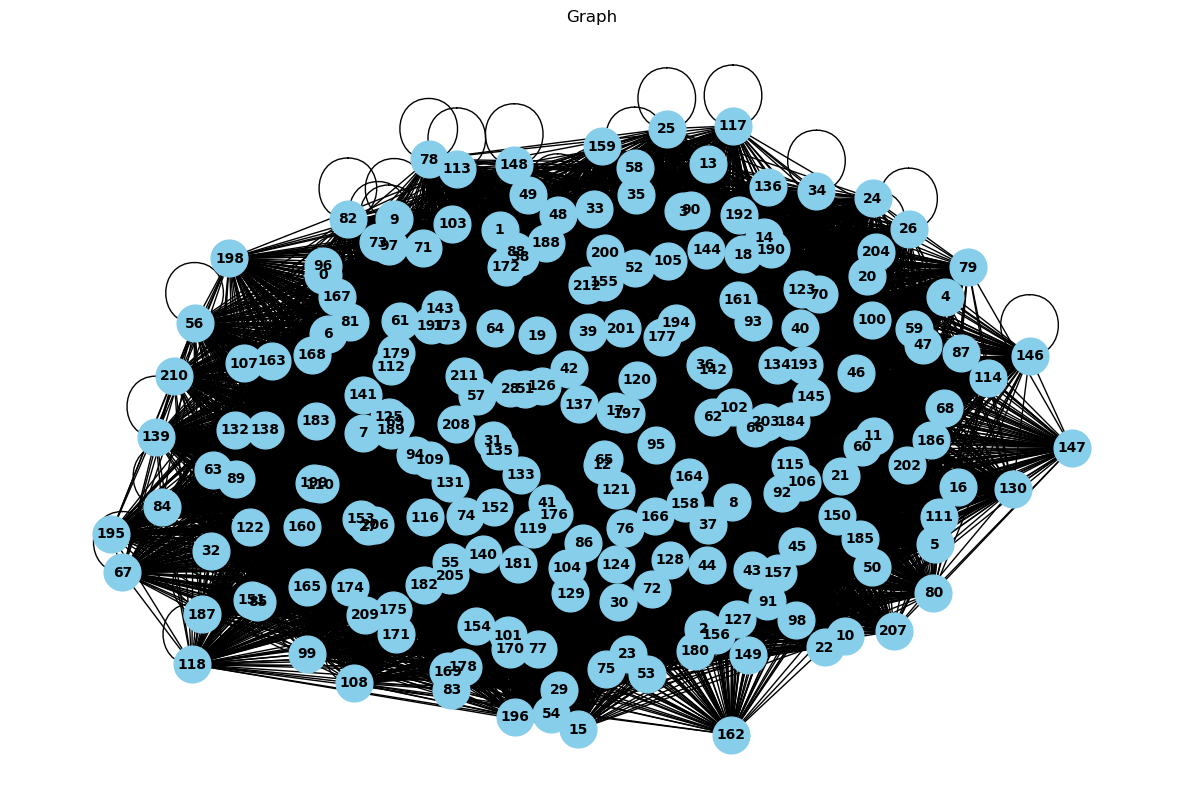

In [42]:
ut.plot_graph_from_adjacency(g, pos=None, title='Graph', size=(15,10))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


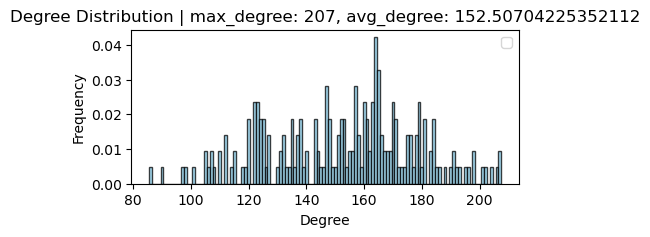

In [43]:
ut.plot_degree_distribution(g, title='Degree Distribution', size=(5,2))

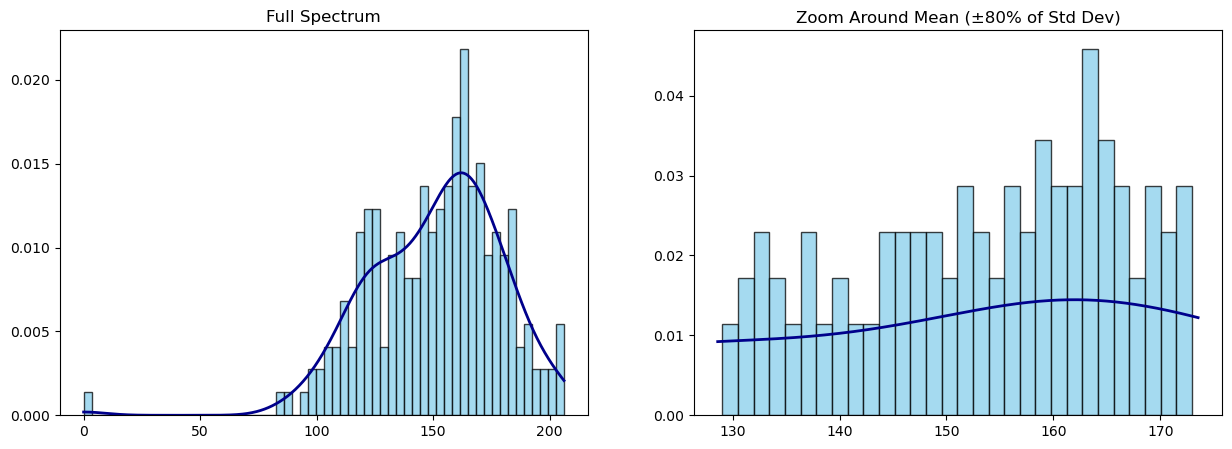

In [46]:
graph_model = GraphModel
s = graph_model.calculate_spectrum(g)
ut.plot_spectrum_and_zoom(s, zoom_scale=0.8)

# Rhesus Brain

# Rattus norvegicus